# 라이브러리 호출

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import folium
from itertools import product, combinations
from sklearn.preprocessing import LabelEncoder

# 데이터 load

In [132]:
df_train = pd.read_csv('./data/sales_train.csv')
df_test = pd.read_csv('./data/test.csv')
df_items = pd.read_csv('./data/items.csv')
df_item_categories = pd.read_csv('./data/item_categories.csv')
df_shops = pd.read_csv('./data/shops.csv')

# 데이터 첫 3행 확인

In [133]:
print(f'df_train \n {df_train.head(3)} \n')
print(f'df_test \n {df_test.head(3)} \n')
print(f'df_items \n {df_items.head(3)} \n')
print(f'df_item_categories \n {df_item_categories.head(3)} \n')
print(f'df_shops \n {df_shops.head(3)} \n')

df_train 
          date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154       999.0           1.0
1  03.01.2013               0       25     2552       899.0           1.0
2  05.01.2013               0       25     2552       899.0          -1.0 

df_test 
    ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233 

df_items 
                                            item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   

   item_category_id  
0                40  
1                76  
2                40   

df_item_categories 
         item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2 

df_shops 
        

# 데이터 요약 정보 확인

In [4]:
print('df_train information')
print(df_train.info(), '\n')
print('df_test information')
print(df_test.info(), '\n')
print('df_items information')
print(df_items.info(), '\n')
print('df_item_categories information')
print(df_item_categories.info(), '\n')
print('df_shops information')
print(df_shops.info(), '\n')

# 결측치가 존재할 가능성이 있는 데이터는 df_train 뿐

df_train information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None 

df_test information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB
None 

df_items information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            ------

# df_train 통계량 정보 확인

In [5]:
print('df_train information')
print(df_train.describe(include='all'))

# date 자료형이 문자열 >>> datetime으로 바꾸면 handling이 용이할 것
# item_price는 음수가 존재할 수 없는데 존재 >>> 자세히 확인 후 처리 필요 
# item_cnt_day 역시 음수가 존재할 수 없는데 존재 >>> 자세히 확인 후 처리 필요

df_train information
              date  date_block_num       shop_id       item_id    item_price  \
count      2935849    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06   
unique        1034             NaN           NaN           NaN           NaN   
top     28.12.2013             NaN           NaN           NaN           NaN   
freq          9434             NaN           NaN           NaN           NaN   
mean           NaN    1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02   
std            NaN    9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03   
min            NaN    0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00   
25%            NaN    7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02   
50%            NaN    1.400000e+01  3.100000e+01  9.343000e+03  3.990000e+02   
75%            NaN    2.300000e+01  4.700000e+01  1.568400e+04  9.990000e+02   
max            NaN    3.300000e+01  5.900000e+01  2.216900e+04  3.079800e+05   

        item_cnt_d

# 중복값 확인

In [6]:
print(f'df_train의 중복 개수 : {df_train.duplicated().sum()}')
print(f'df_test의 중복 개수 : {df_test.duplicated().sum()}')
print(f'df_items의 중복 개수 : {df_items.duplicated().sum()}')
print(f'df_item_categories의 중복 개수 : {df_item_categories.duplicated().sum()}')
print(f'df_shops의 중복 개수 : {df_shops.duplicated().sum()}')

# df_train에만 값이 중복되는 행이 존재 >>> 같은 매장, 같은 물건이 판매된것으로 판단

df_train의 중복 개수 : 6
df_test의 중복 개수 : 0
df_items의 중복 개수 : 0
df_item_categories의 중복 개수 : 0
df_shops의 중복 개수 : 0


# 결측값 확인

In [7]:
print(f'df_train의 결측 개수 : {df_train.isnull().sum()}')
print(f'df_test의 결측 개수 : {df_test.isnull().sum()}')
print(f'df_items의 결측 개수 : {df_items.isnull().sum()}')
print(f'df_item_categories의 결측 개수 : {df_item_categories.isnull().sum()}')
print(f'df_shops의 결측 개수 : {df_shops.isnull().sum()}')

# 결측치 없음
# 하지만 df_train의 데이터가 모든 날짜에 대해 존재하는 것이 아님(head()를 통해 확인한 사항) 
# >>> 존재하지 않는 날짜의 데이터는 상품이 0개가 팔린것으로 판단
# >>> 모든 날짜에 대한 새로운 데이터를 만들어 판매량 0개의 데이터 생성 필요

df_train의 결측 개수 : date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
df_test의 결측 개수 : ID         0
shop_id    0
item_id    0
dtype: int64
df_items의 결측 개수 : item_name           0
item_id             0
item_category_id    0
dtype: int64
df_item_categories의 결측 개수 : item_category_name    0
item_category_id      0
dtype: int64
df_shops의 결측 개수 : shop_name    0
shop_id      0
dtype: int64


# 이상값 확인 및 처리

307980.0/-1.0


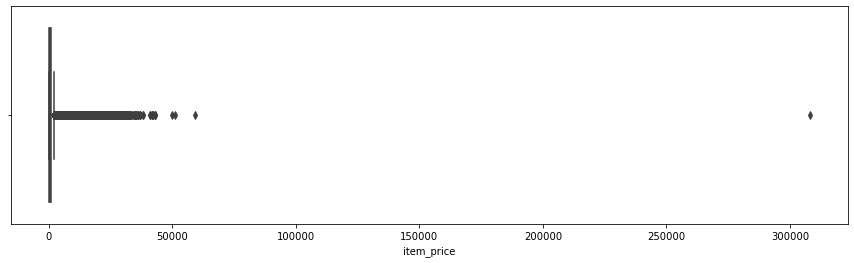

In [8]:
# 이상값 확인(!) : df_train.item_price의 박스 플롯 및 최대/최소값 확인
plt.figure(figsize=(15,4))
sns.boxplot(x=df_train.item_price)
print(df_train.item_price.max(), df_train.item_price.min(), sep='/')

In [9]:
# 이상치로 예상되는 데이터 확인(임의 기준)
df_train[(df_train.item_price>40000) | (df_train.item_price<0)]

# 40000 대는 단순히 가격대가 높은 물건으로 판단
# 이상치의 기준을 49000으로 판단

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0
885138,17.09.2013,8,12,11365,59200.0,1.0
1006638,24.10.2013,9,12,7238,42000.0,1.0
1163158,13.12.2013,11,12,6066,307980.0,1.0
1488135,20.03.2014,14,25,13199,50999.0,1.0
2143903,20.11.2014,22,12,14173,40900.0,1.0
2327159,29.01.2015,24,12,7241,49782.0,1.0
2885692,23.10.2015,33,42,13403,42990.0,1.0
2893100,20.10.2015,33,38,13403,41990.0,1.0
2910155,20.10.2015,33,12,13403,41990.0,1.0


In [10]:
# 이상값 확인(1-1) : item_price가 -1인 경우 확인
df_items[df_items.item_id==2973]

,item_name,item_id,item_category_id
2973,"DmC Devil May Cry [PS3, русские субтитры]",2973,19


In [11]:
# 해당 상품 가격 확인
df_train[df_train.item_id==2973].item_price.unique()

# 일정하지 않음 > 비슷한 날짜의 가격 확인

array([ 2.49900000e+03,  2.42757143e+03,  2.49850000e+03,  2.49883333e+03,
        2.49875000e+03,  2.49891667e+03,  1.90100000e+03,  1.99900000e+03,
        2.49887500e+03,  2.49890000e+03,  2.24900000e+03,  2.37395000e+03,
        2.49870000e+03,  2.49840000e+03,  1.99840000e+03,  1.24950000e+03,
        1.24900000e+03,  1.24910000e+03, -1.00000000e+00,  1.24890000e+03,
        1.04900000e+03,  2.24880000e+03,  1.56203000e+03,  1.48761000e+03,
        1.27527000e+03,  1.27501000e+03,  1.38840000e+03,  1.32929000e+03,
        1.52391000e+03,  1.83785000e+03,  1.45300000e+03,  1.45412000e+03,
        1.29758000e+03,  1.25000000e+03,  1.24870000e+03,  1.83237000e+03])

In [134]:
# df_train의 date 자료형을 datetime으로 변경
df_train.date = df_train.date.apply(lambda x:x.replace('.','/'))
df_train.date = pd.to_datetime(df_train.date, format='%d/%m/%Y')
print(df_train.date.dtypes)
df_train.head()

datetime64[ns]


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [13]:
# 2013년 5월 10일부터 같은 아이템의 10개 데이터 확인
df_train[(df_train.date.dt.year==2013)&(df_train.date.dt.month==5)&(df_train.date.dt.day>10)&(df_train.item_id==2973)]\
.sort_values(by='date').head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
486054,2013-05-11,4,54,2973,2499.0,1.0
446461,2013-05-13,4,29,2973,1249.0,1.0
480577,2013-05-14,4,35,2973,1249.5,1.0
521031,2013-05-14,4,43,2973,1249.0,1.0
473481,2013-05-14,4,42,2973,1249.0,1.0
463473,2013-05-14,4,41,2973,1249.0,1.0
453035,2013-05-14,4,25,2973,1249.1,2.0
456795,2013-05-14,4,21,2973,1249.0,1.0
484683,2013-05-15,4,32,2973,-1.0,1.0
469026,2013-05-15,4,46,2973,1249.5,1.0


In [135]:
# 이상치 처리(1-1) : 1249로 예상되므로 -1을 1249로 수정
print(f'변경 전 : {df_train.loc[484683,"item_price"]}')
df_train.loc[484683,'item_price']=1249.0
print(f'변경 후 : {df_train.loc[484683,"item_price"]}')

변경 전 : -1.0
변경 후 : 1249.0


In [15]:
# 이상치 확인(1-2) - item_price가 49000보다 높은 경우 확인
df_train[df_train.item_price>49000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
885138,2013-09-17,8,12,11365,59200.0,1.0
1163158,2013-12-13,11,12,6066,307980.0,1.0
1488135,2014-03-20,14,25,13199,50999.0,1.0
2327159,2015-01-29,24,12,7241,49782.0,1.0


In [16]:
# 11365 item 데이터 확인
df_train[(df_train.date.dt.year==2013)&(df_train.date.dt.month==9)&(df_train.date.dt.day>12)&(df_train.item_id==11365)]\
.sort_values(by='date').head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
885137,2013-09-16,8,12,11365,1283.333333,3.0
885138,2013-09-17,8,12,11365,59200.000000,1.0
885165,2013-09-23,8,12,11365,11880.000000,1.0
885164,2013-09-24,8,12,11365,2640.000000,3.0
885163,2013-09-25,8,12,11365,7240.000000,1.0
885162,2013-09-26,8,12,11365,2770.000000,1.0
885161,2013-09-28,8,12,11365,9370.000000,1.0


In [17]:
df_items[df_items.item_id==11365] 

# 해당 상품은 해외배송
# 매장 아이디가 동일한걸로 보아 해외배송을 하는 매장으로 예상

,item_name,item_id,item_category_id
11365,Доставка (EMS),11365,9


In [18]:
df_train[df_train.item_id==11365]['item_price'].mean()

# 59200은 평균과 너무 큰 차이 >>> 이상치로 판단

1887.5654163364798

In [19]:
# 6066 item 데이터 확인
df_train[(df_train.date.dt.year==2013)&(df_train.date.dt.month==12)&(df_train.date.dt.day>1)&(df_train.item_id==6066)]\
.sort_values(by='date').head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,2013-12-13,11,12,6066,307980.0,1.0


In [20]:
df_items[df_items.item_id==6066]

# 원격 제어 프로그램으로 보임
# 가격이 현실성이 없음 >>> 이상치로 판단

,item_name,item_id,item_category_id
6066,Radmin 3 - 522 лиц.,6066,75


In [21]:
# 13199 item 데이터 확인
df_train[(df_train.item_id==13199)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1488135,2014-03-20,14,25,13199,50999.0,1.0


In [ ]:
df_items[df_items.item_id==13199]

# 반지의 제왕 체스 상품
# 인터넷 상에서 5~7000 루블 가격대 형성
# 이상치로 판단 > 삭제 혹은 10을 나누어 5099.9라면 납득할만한 가격임

,item_name,item_id,item_category_id
13199,Коллекционные шахматы (Властелин Колец),13199,69


In [22]:
# 7241 item 데이터 확인
df_train[(df_train.item_id==7241)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2327159,2015-01-29,24,12,7241,49782.0,1.0


In [23]:
df_items[df_items.item_id==7241]

# UserGate Proxy & Firewall 6.X버전의 소프트웨어
# 품절이라 가격은 확인 불가
# 저장된 페이지에서 1000 루블 대 확인
# 이상치로 판단

,item_name,item_id,item_category_id
7241,UserGate Proxy & Firewall 6.X с модулем фильтр...,7241,75


In [136]:
# 이상치 처리(1-2) : item_price가 49000 이상인 데이터 제거
df_train = df_train[df_train.item_price<49000]
df_train.item_price.max()

42990.0

2169.0/-22.0


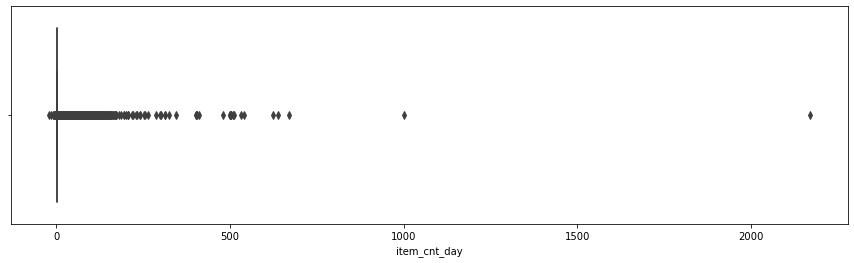

In [25]:
# 이상치 확인(2) : df_train.item_cnt_day
plt.figure(figsize=(15,4))
sns.boxplot(x=df_train.item_cnt_day)
print(df_train.item_cnt_day.max(), df_train.item_cnt_day.min(), sep='/')

In [26]:
# 이상치 확인(2-1) : 이상치로 예상되는 데이터 확인(임의 기준으로 450 이상)
df_train[(df_train.item_cnt_day>=450)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1573253,2014-04-22,15,27,8057,1200.000000,502.0
1708207,2014-06-28,17,25,20949,5.000000,501.0
2048518,2014-10-02,21,12,9242,1500.000000,512.0
2067669,2014-10-09,21,55,19437,899.000000,508.0
2257299,2014-12-19,23,12,20949,4.000000,500.0
2326930,2015-01-15,24,12,20949,4.000000,1000.0
2608040,2015-04-14,27,12,3731,1904.548077,624.0
2625847,2015-05-19,28,12,10209,1499.000000,480.0
2626181,2015-05-19,28,12,11373,155.192950,539.0
2851073,2015-09-29,32,55,9249,1500.000000,533.0


In [27]:
# 각 상품이 무엇인지 확인
num = [8057,20949,9242,19437,3731,10209,11373,9249,9248]
item_name = []

for i in num:
  item_name.append(df_items[df_items.item_id==i])

item_name = pd.DataFrame(np.array(item_name).reshape(len(item_name),-1))
item_name

# 순서대로 iTunes, 비닐봉투, 행사티켓, 게임, 게임, 게임, 배송서비스, 행사티켓, 행사티켓

,0,1,2
0,iTunes 1500 руб.,8057,32
1,Фирменный пакет майка 1С Интерес белый (34*42)...,20949,71
2,"Билет ""ИгроМир 2014"" (на один день (отдельно -...",9242,8
3,"Средиземье: Тени Мордора [PC, Цифровая версия]",19437,31
4,"Grand Theft Auto V [PC, русские субтитры]",3731,30
5,"Ведьмак 3: Дикая охота [PC, русская версия]",10209,28
6,Доставка до пункта выдачи (Boxberry),11373,9
7,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) У...",9249,8
8,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) [...",9248,80


In [28]:
# 같은 매장, 같은 상품들의 iTunes 판매이력 확인
df_train[(df_train.item_id==8057)&(df_train.shop_id==27)]

# i tunes의 경우 단순 행사로 인해 많이 판매된 것으로 판단 >>> 제거해야함

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1130026,2013-12-28,11,27,8057,1500.0,1.0
1573252,2014-04-23,15,27,8057,1200.0,401.0
1573253,2014-04-22,15,27,8057,1200.0,502.0
1631422,2014-05-24,16,27,8057,1500.0,1.0
1709781,2014-06-02,17,27,8057,1500.0,1.0
1847640,2014-07-20,18,27,8057,1500.0,1.0
1847641,2014-07-04,18,27,8057,1500.0,1.0
1847642,2014-07-03,18,27,8057,1500.0,2.0
1952598,2014-08-29,19,27,8057,1500.0,1.0
1952599,2014-08-20,19,27,8057,1500.0,1.0


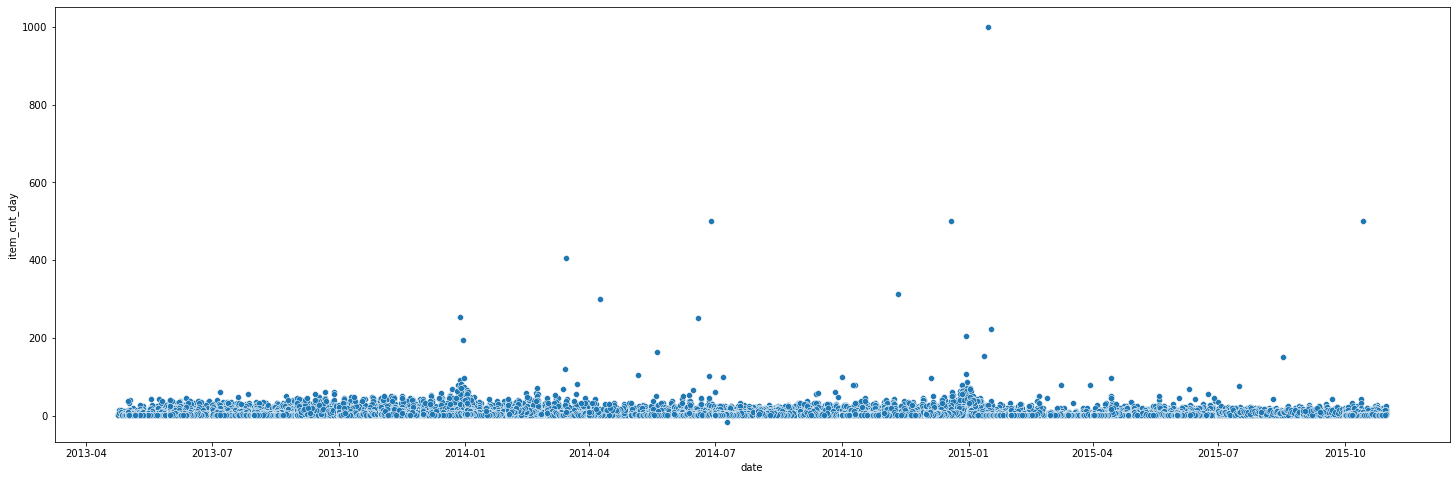

In [29]:
# 비닐봉투

vinyl = df_train[(df_train.item_id==20949)]
plt.figure(figsize=(25,8))
sns.scatterplot(x='date', y='item_cnt_day', data=vinyl)
plt.show()

# 상당수가 12번 매장
# 12번 매장은 해외배송을 하는 업체라고 판단했었음
# 비닐봉투 판매 추세를 확인
# 500 이상은 이상치로 판단 > 제거

In [30]:
# 행사티켓

df_items[df_items['item_name'].str.contains('ИгроМир')]

# ИгроМир라는 행사의 티켓으로 2014년, 2015년 모두 특정 기간만 판매량이 높은 상품
# 2015년에는 이미 행사티켓이 판매되었고 10월 1-4일에 행사 진행되었음

,item_name,item_id,item_category_id
9241,"Билет ""ИгроМир 2014"" (на один день (отдельно -...",9241,8
9242,"Билет ""ИгроМир 2014"" (на один день (отдельно -...",9242,8
9243,"Билет ""ИгроМир 2014"" - семейный до 4-х человек...",9243,8
9244,"Билет ""ИгроМир 2015"" - 2 октября 2015 (сайт) [...",9244,80
9245,"Билет ""ИгроМир 2015"" - 2 октября 2015 (сайт) У...",9245,8
9246,"Билет ""ИгроМир 2015"" - 2 октября 2015 [Цифрова...",9246,80
9247,"Билет ""ИгроМир 2015"" - 2 октября 2015 УПР [Циф...",9247,8
9248,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) [...",9248,80
9249,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) У...",9249,8
9250,"Билет ""ИгроМир 2015"" - 3 октября 2015 [Цифрова...",9250,80


In [31]:
# 게임
# 게임의 경우 인기에 따라 판매량이 급등할 것이라고 판단
# 과거 2015년 11월 발매된 게임을 찾아 보았을 때, 충분히 판매량이 증가할 가능성이 존재함(스타크래프트2)
# 따라서 데이터 살리기로 판단

In [32]:
# 배송서비스
df_train[(df_train.date.dt.year==2015)&(df_train.date.dt.month==10)&(df_train.date.dt.day==28)&\
         (df_train.shop_id==12)&~(df_train.item_id==11373)].item_cnt_day.sum()

# 같은날 판매된 상품량은 배송서비스를 제외하면 90건
# 이전의 배송건이 있다하더라도 2000이넘는 수치는 비정상으로 판단
# 제거 필요

90.0

In [33]:
# 이상치 처리(2-1) - item_cnt_day의 값이 450이상 인 행 중 게임을 제외하고 삭제
# 삭제할 데이터 확인
print(len(df_train[(df_train.item_cnt_day>=450)&~(df_train.item_id==19437)&~(df_train.item_id==3731)&~(df_train.item_id==10209)]))
df_train[(df_train.item_cnt_day>=450)&~(df_train.item_id==19437)&~(df_train.item_id==3731)&~(df_train.item_id==10209)]

12


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1573253,2014-04-22,15,27,8057,1200.000000,502.0
1708207,2014-06-28,17,25,20949,5.000000,501.0
2048518,2014-10-02,21,12,9242,1500.000000,512.0
2257299,2014-12-19,23,12,20949,4.000000,500.0
2326930,2015-01-15,24,12,20949,4.000000,1000.0
2626181,2015-05-19,28,12,11373,155.192950,539.0
2851073,2015-09-29,32,55,9249,1500.000000,533.0
2851091,2015-09-30,32,55,9249,1702.825746,637.0
2864235,2015-09-30,32,12,9248,1692.526158,669.0
2864260,2015-09-29,32,12,9248,1500.000000,504.0


In [137]:
# 인덱스를 이용해 해당 행 삭제
idx_list = df_train[(df_train.item_cnt_day>=450)&~(df_train.item_id==19437)&~(df_train.item_id==3731)&~(df_train.item_id==10209)].index
print(len(df_train))
df_train_drop = df_train.drop(idx_list)
print(len(df_train_drop))
df_train = df_train_drop
print(len(df_train))

2935845
2935833
2935833


In [35]:
# 이상치 확인(2-2) - item_cnt_day가 0 미만인 경우
df_train[(df_train.item_cnt_day<0)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,2013-01-05,0,25,2552,899.0,-1.0
148,2013-01-23,0,25,2321,999.0,-1.0
175,2013-01-07,0,25,2199,1449.0,-1.0
807,2013-01-02,0,25,2330,599.0,-1.0
1041,2013-01-13,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,2015-10-26,33,25,3917,449.0,-1.0
2934462,2015-10-18,33,25,4896,6398.0,-1.0
2935263,2015-10-05,33,25,10039,249.0,-1.0
2935643,2015-10-16,33,25,7893,2990.0,-1.0


In [36]:
# 음수인 일일판매량 고유값 확인
df_train[(df_train.item_cnt_day<0)].item_cnt_day.unique()

array([ -1.,  -5.,  -6.,  -3.,  -2.,  -4., -22., -16.,  -9.])

In [37]:
# -22인 상품이 이전 얼마나 판매되었는지 확인
check_item_id = df_train[(df_train.item_cnt_day==-22)]['item_id'].iloc[0]
df_train[(df_train.item_id==check_item_id)&(df_train.date<='2013-11-02')]

# 동일한 매장에서 동일 상품이 동일 수량으로 판매된 이력이 존재
# 따라서 음수값은 환불을 의미하는 것으로 판단
# 따라서 월별 판매량을 예상하는데에는 음수값을 그대로 이용하는 것이 옳다고 판단

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
8820,2013-01-04,0,22,8023,20.0,1.0
11064,2013-01-02,0,19,8023,20.0,1.0
11065,2013-01-03,0,19,8023,20.0,1.0
11066,2013-01-06,0,19,8023,20.0,1.0
15486,2013-01-02,0,28,8023,20.0,1.0
...,...,...,...,...,...,...
870409,2013-09-28,8,6,8023,15.0,1.0
885224,2013-09-25,8,12,8023,15.0,22.0
902644,2013-09-08,8,27,8023,15.0,1.0
936805,2013-10-16,9,38,8023,15.0,1.0


In [38]:
# 이상치 확인(3) - 일일판매량의 단위가 소수점인 경우가 있는지 확인
df_train[(df_train.item_cnt_day % 1 != 0)]

# 없음

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day


In [138]:
# 실수형일 필요가 없으므로 정수형으로 데이터타입 변환
df_train.item_cnt_day=df_train.item_cnt_day.astype('int')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935833 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3)
memory usage: 145.6 MB


# 매장명 데이터 확인

In [40]:
# 데이터 확인
df_shops.head()

# 번역을 통해 살펴본 결과, 각 매장명의 첫 단어는 우리나라로 치면 시도명
# 두번째 단어는 쇼핑몰의 종류( ТЦ,ТРК 등)나 시군구명(Орджоникидзе) 등임
# 실제 매장의 이름은 shop_id로 인해 따로 속성을 추가할 필요가 없음
# 쇼핑몰의 종류나 시군구명은 모든 데이터에 동일하게 존재하지 않으므로 사용 불가
# 따라서 각 시도명을 추출

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [139]:
# 시도명 추출
df_shops['city'] = df_shops['shop_name'].str.split(' ').str[0]
df_shops.head()

,shop_name,shop_id,city
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский


In [42]:
# 시도명 유일값 확인
df_shops['city'].unique()

# !Якутск와 Якутск이 따로 존재
# 온라인 판매를 뜻하는 단어도 존재하나, 일종의 도시처럼 분류하면 되므로 그대로 활용

array(['!Якутск', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда', 'Воронеж',
       'Выездная', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
       'Коломна', 'Красноярск', 'Курск', 'Москва', 'Мытищи', 'Н.Новгород',
       'Новосибирск', 'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев',
       'Сургут', 'Томск', 'Тюмень', 'Уфа', 'Химки', 'Цифровой', 'Чехов',
       'Якутск', 'Ярославль'], dtype=object)

In [140]:
# 중복 시도명 통합
print(len(df_shops.city.unique()))
for i in range(len(df_shops)):
  if df_shops.iloc[i,2] == '!Якутск':
    df_shops.iloc[i,2] = 'Якутск'   
print(len(df_shops.city.unique()))

32
31


In [44]:
# csv파일을 엑셀로 확인했을 때, 비슷한 이름이 존재

# 이름이 차이가 나지 않는 데이터 확인
print(df_shops['shop_name'][0], df_shops['shop_name'][57], sep='----')
print(df_shops['shop_name'][1], df_shops['shop_name'][58], sep='----')
print(df_shops['shop_name'][10], df_shops['shop_name'][11], sep='----')
print(df_shops['shop_name'][39], df_shops['shop_name'][40], sep='----')

# 다른 매장인지 추가 확인 필요

!Якутск Орджоникидзе, 56 фран----Якутск Орджоникидзе, 56
!Якутск ТЦ "Центральный" фран----Якутск ТЦ "Центральный"
Жуковский ул. Чкалова 39м?----Жуковский ул. Чкалова 39м²
РостовНаДону ТРК "Мегацентр Горизонт"----РостовНаДону ТРК "Мегацентр Горизонт" Островной


In [45]:
# 0번 매장과 57번 매장 확인
df_train[df_train.shop_id==0].sort_values(by='date')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
43384,2013-01-03,0,0,18826,205.0,1
43431,2013-01-03,0,0,19064,578.0,1
41184,2013-01-03,0,0,5591,1556.0,1
44102,2013-01-03,0,0,17560,247.0,1
40556,2013-01-03,0,0,5629,1925.0,1
...,...,...,...,...,...,...
181793,2013-02-28,1,0,7234,378.0,1
174967,2013-02-28,1,0,1522,1313.0,1
179384,2013-02-28,1,0,18661,27.0,1
174940,2013-02-28,1,0,1833,1589.0,2


In [46]:
df_train[df_train.shop_id==57].sort_values(by='date')

# 정확하게 앞에 매장 판매일 이후부터 다음매장 데이터가 존재 > 같은 매장이지만 입력오류일것

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
260891,2013-03-01,2,57,257,249.0,1
260669,2013-03-01,2,57,1398,599.0,1
341018,2013-03-01,2,57,6490,349.5,1
338130,2013-03-01,2,57,18164,349.0,2
341017,2013-03-01,2,57,6478,199.5,1
...,...,...,...,...,...,...
2895733,2015-10-31,33,57,7780,198.0,1
2899878,2015-10-31,33,57,17772,999.0,1
2901029,2015-10-31,33,57,18719,49.0,1
2895305,2015-10-31,33,57,1584,3999.0,1


In [47]:
# 나머지도 확인
print(df_train[df_train.shop_id==1].date.max(), df_train[df_train.shop_id==58].date.min())
print(df_train[df_train.shop_id==10].date.max(), df_train[df_train.shop_id==11].date.min())
print(df_train[df_train.shop_id==39].date.max(), df_train[df_train.shop_id==40].date.min())

# 1,58의 경우는 위와 동일했으나, 10,11과 39,40은 동일하지 않음 > 추가적으로 확인

2013-02-28 00:00:00 2013-03-01 00:00:00
2015-10-31 00:00:00 2015-02-01 00:00:00
2015-10-31 00:00:00 2014-03-01 00:00:00


In [48]:
print(df_train[(df_train.shop_id==11)])
print(df_train[(df_train.shop_id==10)&(df_train.date>'2015-02-01')])

# 2월달 데이터만 따로 빠져나온것 > 같은 매장임 > 11이 10으로 통합되야함

              date  date_block_num  shop_id  item_id  item_price  item_cnt_day
2461045 2015-02-27              25       11    22162      237.11             1
2461046 2015-02-23              25       11    22162      237.11             1
2461047 2015-02-20              25       11    22162      270.00             1
2461048 2015-02-11              25       11    22162      270.00             1
2461049 2015-02-10              25       11    22162      270.00             1
...            ...             ...      ...      ...         ...           ...
2462003 2015-02-12              25       11    10389      219.00             1
2462004 2015-02-07              25       11    10382      460.00             1
2462005 2015-02-17              25       11    10379      195.00             1
2462006 2015-02-18              25       11    10298       99.00             1
2462007 2015-02-02              25       11    10518      295.00             1

[499 rows x 6 columns]
              date  date_blo

In [49]:
print(df_train[df_train.shop_id==39].date.max(), df_train[df_train.shop_id==40].date.max())
print(df_train[df_train.shop_id==39].date.min(), df_train[df_train.shop_id==40].date.min())
print(df_train[(df_train.shop_id==39)&(df_train.date=='2014-03-01')],'\n')
print(df_train[(df_train.shop_id==40)&(df_train.date=='2014-03-01')])

# 같은 매장이라고 보기 힘듬, 다만 40번매장은 문을 닫았을 것으로 판단됨
# 폐점 여부가 필요한 속성인가? > 예측값이 매장별/아이템별 한달 판매량이므로 폐장한 매장이라면 예측값이 0이어야함 > 따라서 의미있다고 판단

2015-10-31 00:00:00 2015-01-29 00:00:00
2014-03-01 00:00:00 2014-03-01 00:00:00
              date  date_block_num  shop_id  item_id  item_price  item_cnt_day
1530407 2014-03-01              14       39      934       399.0             1
1530416 2014-03-01              14       39     1459      1199.0             1
1530418 2014-03-01              14       39     2308       299.0             1
1530438 2014-03-01              14       39     1511       799.0             1
1530755 2014-03-01              14       39     7213       899.0             1
1530756 2014-03-01              14       39     7207       199.0             1
1530758 2014-03-01              14       39     7206       199.0             1
1530797 2014-03-01              14       39     7736       299.0             2
1530829 2014-03-01              14       39     6185       499.0             1
1530841 2014-03-01              14       39     7004       999.0             1
1530844 2014-03-01              14       39     700

In [141]:
# 잘못 입력된 걸로 판단되는 매장의 id 통합
df_train['shop_id'].replace(0,57,inplace=True)
df_train['shop_id'].replace(1,58,inplace=True)
df_train['shop_id'].replace(11,10,inplace=True)

df_test['shop_id'].replace(0,57,inplace=True)
df_test['shop_id'].replace(1,58,inplace=True)
df_test['shop_id'].replace(11,10,inplace=True)
df_train['shop_id'].unique(), df_test['shop_id'].unique()

(array([59, 25, 24, 23, 19, 22, 18, 21, 28, 27, 29, 26,  4,  6,  2,  3,  7,
        57, 58, 16, 15,  8, 10, 14, 13, 12, 53, 31, 30, 32, 35, 56, 54, 47,
        50, 42, 43, 52, 51, 41, 38, 44, 37, 46, 45,  5, 55, 17,  9, 49, 39,
        40, 48, 34, 33, 20, 36], dtype=int64),
 array([ 5,  4,  6,  3,  2,  7, 10, 12, 28, 31, 26, 25, 22, 24, 21, 15, 16,
        18, 14, 19, 42, 50, 49, 53, 52, 47, 48, 57, 58, 59, 55, 56, 36, 37,
        35, 38, 34, 46, 41, 44, 39, 45], dtype=int64))

In [54]:
# 폐점 매장 여부 확인 - 판매이력이 2015년 6월부터 없는 경우
closed_shop = []
for i in df_train['shop_id'].unique():
    if df_train[df_train.shop_id==i].date.max() < pd.Timestamp(2015, 6, 1):
        closed_shop.append(i)
df_test[df_test.shop_id.isin(closed_shop)]
# 테스트 데이터에서 이미 다 제외됨 > 따라서 폐점 여부 속성 추가는 불필요
# 예측해야하는 신규매장은?

,ID,shop_id,item_id


In [57]:
df_test[~df_test.shop_id.isin(df_train.shop_id.unique())]

# 신규매장 없음

,ID,shop_id,item_id


In [142]:
# 예측에 불필요한(데스트 데이터에 없는) 매장 데이터 제거

print(df_train)
df_train = df_train[df_train['shop_id'].isin(df_test['shop_id'].unique())]
print(df_train)

              date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0       2013-01-02               0       59    22154      999.00             1
1       2013-01-03               0       25     2552      899.00             1
2       2013-01-05               0       25     2552      899.00            -1
3       2013-01-06               0       25     2554     1709.05             1
4       2013-01-15               0       25     2555     1099.00             1
...            ...             ...      ...      ...         ...           ...
2935844 2015-10-10              33       25     7409      299.00             1
2935845 2015-10-09              33       25     7460      299.00             1
2935846 2015-10-14              33       25     7459      349.00             1
2935847 2015-10-22              33       25     7440      299.00             1
2935848 2015-10-03              33       25     7460      299.00             1

[2935833 rows x 6 columns]
              date  date

In [60]:
# 각 시도별 위경도 데이터활용 위치 확인
# 구글 지도를 활용해 도시별 위경도 추출 후 사용

In [61]:
df_latlong = pd.read_excel('./data/latlong.xlsx')
df_latlong.columns=['city','latlong']
df_latlong['lat']=df_latlong['latlong'].str.split(',').str[0]
df_latlong['long']=df_latlong['latlong'].str.split(',').str[1]

In [62]:
df_latlong.dropna(inplace=True)
df_latlong.drop('latlong',axis=1,inplace=True)
df_latlong['lat']=df_latlong['lat'].astype('float')
df_latlong['long']=df_latlong['long'].astype('float')
df_latlong.head()

,city,lat,long
0,Адыгея,44.488691,39.166305
1,Балашиха,55.768381,37.922410
2,Волжский,48.818396,44.686841
3,Вологда,59.222198,39.805926
4,Воронеж,51.699929,39.052987


In [63]:
map = folium.Map(location = [55.5815245,36.8251381],tiles = 'StamenTerrain', zoom_start = 11)

for idx in df_latlong.index:
  lat = df_latlong.loc[idx, 'lat']
  lng = df_latlong.loc[idx, 'long']
  city = df_latlong.loc[idx, 'city']
  
  folium.Marker(location = [lat,lng]).add_to(map)

map
# 도시를 크게 묶을 만큼 군집이 형성되지 않으므로 도시명 자체로 라벨 인코딩 진행

In [143]:
# 도시명 라벨 인코딩
df_shops['city_label']=LabelEncoder().fit_transform(df_shops.city)
df_shops_label = df_shops.drop(['shop_name','city'],axis=1)
df_shops_label.head()

,shop_id,city_label
0,0,29
1,1,29
2,2,0
3,3,1
4,4,2


# 상품분류 데이터 확인

In [65]:
df_item_categories.head(10)
# -를 기준으로 대분류-소분류로 데이터가 존재
# 각 대분류와 소분류에 대해 라벨 인코딩 진행

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [144]:
# 대분류/소분류 컬럼 생성
df_item_categories['main_cat'] = df_item_categories['item_category_name'].str.split(' - ').str[0].str.strip()
df_item_categories['sub_cat'] = df_item_categories['item_category_name'].str.split(' - ').str[1].str.strip()
df_item_categories.head(10)

,item_category_name,item_category_id,main_cat,sub_cat
0,PC - Гарнитуры/Наушники,0,PC,Гарнитуры/Наушники
1,Аксессуары - PS2,1,Аксессуары,PS2
2,Аксессуары - PS3,2,Аксессуары,PS3
3,Аксессуары - PS4,3,Аксессуары,PS4
4,Аксессуары - PSP,4,Аксессуары,PSP
5,Аксессуары - PSVita,5,Аксессуары,PSVita
6,Аксессуары - XBOX 360,6,Аксессуары,XBOX 360
7,Аксессуары - XBOX ONE,7,Аксессуары,XBOX ONE
8,Билеты (Цифра),8,Билеты (Цифра),NaN
9,Доставка товара,9,Доставка товара,NaN


In [67]:
df_item_categories.info()
# 12개 항목에 대해 소분류 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
 2   main_cat            84 non-null     object
 3   sub_cat             77 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.8+ KB


In [145]:
# 소분류 NaN을 etc로 대체
df_item_categories.fillna('etc', inplace=True)

In [146]:
# 대분류와 소분류 라벨 인코딩, 필요없는 컬럼 제거
df_item_categories['main_cat']=LabelEncoder().fit_transform(df_item_categories['main_cat'])
df_item_categories['sub_cat']=LabelEncoder().fit_transform(df_item_categories['sub_cat'])
df_item_categories_label = df_item_categories.drop('item_category_name',axis=1)
df_item_categories_label.head()

,item_category_id,main_cat,sub_cat
0,0,0,31
1,1,1,11
2,2,1,12
3,3,1,13
4,4,1,15


# 상품 데이터 확인

In [70]:
df_items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [147]:
# item_name은 필요없음
df_items.drop('item_name',axis=1, inplace=True)

In [72]:
df_items.head()

,item_id,item_category_id
0,0,40
1,1,76
2,2,40
3,3,40
4,4,40


# 데이터 병합 및 피쳐 추가

In [148]:
# df_train에 존재하는 'date_block_num', 'shop_id', 'item_id'로 가능한 조합으로 데이터프레임 생성

train_1 = []

for i in df_train.date_block_num.unique():
    shop = df_train[df_train['date_block_num']==i].shop_id.unique()
    item = df_train[df_train['date_block_num']==i].item_id.unique()
    train_1.append(np.array(list(product([i], shop, item))))

col_names = ['date_block_num', 'shop_id', 'item_id'] 
train_1 = pd.DataFrame(np.vstack(train_1), columns=col_names)
train_1.head()

,date_block_num,shop_id,item_id
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564


In [149]:
# 'date_block_num', 'shop_id', 'item_id'에 따른 월별 판매량(target) 및 최고/최저/평균 판매가 컬럼 추가  
item_cnt_month = df_train.pivot_table(index=col_names, values=['item_price','item_cnt_day'], aggfunc={'item_price':['max','min','mean'],'item_cnt_day':'sum'})
item_cnt_month = item_cnt_month.reset_index()
item_cnt_month.columns = ['date_block_num', 'shop_id', 'item_id', 'item_cnt_month', 'item_price_max','item_price_mean','item_price_min']
item_cnt_month.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_price_max,item_price_mean,item_price_min
0,0,2,27,1,2499.0,2499.0,2499.0
1,0,2,33,1,499.0,499.0,499.0
2,0,2,317,1,299.0,299.0,299.0
3,0,2,438,1,299.0,299.0,299.0
4,0,2,471,2,399.0,399.0,399.0


In [150]:
# train_1에 병합 및 NaN을 0으로 변경
train_2 = train_1.merge(item_cnt_month, on=col_names, how='left')
train_2.fillna(0, inplace=True)
train_2.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_price_max,item_price_mean,item_price_min
0,0,59,22154,1.0,999.0,999.0,999.0
1,0,59,2552,0.0,0.0,0.0,0.0
2,0,59,2554,0.0,0.0,0.0,0.0
3,0,59,2555,0.0,0.0,0.0,0.0
4,0,59,2564,0.0,0.0,0.0,0.0


In [151]:
# df_test 병합
test_1 = df_test.drop('ID', axis=1)
test_1['date_block_num'] = 34
train_3 = pd.concat([train_2,test_1], ignore_index=True, join='outer', keys=col_names)
train_3.tail()

,date_block_num,shop_id,item_id,item_cnt_month,item_price_max,item_price_mean,item_price_min
8860573,34,45,18454,NaN,NaN,NaN,NaN
8860574,34,45,16188,NaN,NaN,NaN,NaN
8860575,34,45,15757,NaN,NaN,NaN,NaN
8860576,34,45,19648,NaN,NaN,NaN,NaN
8860577,34,45,969,NaN,NaN,NaN,NaN


In [152]:
# df_items, df_item_categories, df_shops 병합
train_4 = train_3.merge(df_shops_label, on='shop_id', how='left')
train_4 = train_4.merge(df_items, on='item_id', how='left')
train_4 = train_4.merge(df_item_categories_label, on='item_category_id', how='left')
train_4.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_price_max,item_price_mean,item_price_min,city_label,item_category_id,main_cat,sub_cat
0,0,59,22154,1.0,999.0,999.0,999.0,30,37,11,1
1,0,59,2552,0.0,0.0,0.0,0.0,30,58,13,29
2,0,59,2554,0.0,0.0,0.0,0.0,30,58,13,29
3,0,59,2555,0.0,0.0,0.0,0.0,30,56,13,5
4,0,59,2564,0.0,0.0,0.0,0.0,30,59,13,40


In [153]:
# 메모리 문제 >>> 사용하지 않을 변수 삭제
del train_1, train_2, train_3

In [154]:
# 메모리문제 >>> 데이터타입 변경
print(train_4.info())

int_col = ['date_block_num', 'shop_id', 'item_id', 'city_label',
       'item_category_id', 'main_cat', 'sub_cat']
 
float_col = ['item_cnt_month', 'item_price_mean','item_price_max','item_price_min']

for i in int_col:
    train_4[i] = pd.to_numeric(train_4[i], downcast='integer')
for i in float_col:
    train_4[i] = pd.to_numeric(train_4[i], downcast='float')

print(train_4.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8860578 entries, 0 to 8860577
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date_block_num    int64  
 1   shop_id           int64  
 2   item_id           int64  
 3   item_cnt_month    float64
 4   item_price_max    float64
 5   item_price_mean   float64
 6   item_price_min    float64
 7   city_label        int32  
 8   item_category_id  int64  
 9   main_cat          int32  
 10  sub_cat           int32  
dtypes: float64(4), int32(3), int64(4)
memory usage: 709.8 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8860578 entries, 0 to 8860577
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date_block_num    int8   
 1   shop_id           int8   
 2   item_id           int16  
 3   item_cnt_month    float32
 4   item_price_max    float32
 5   item_price_mean   float32
 6   item_price_min    float32
 7   city_label        in

In [155]:
# 각 date_block_num 별 해당 년/월 피처 추가
train_4['year'] = (train_4['date_block_num'] // 12) + 2013
train_4['month'] = (train_4['date_block_num'] % 12) + 1
train_4.tail() 

,date_block_num,shop_id,item_id,item_cnt_month,item_price_max,item_price_mean,item_price_min,city_label,item_category_id,main_cat,sub_cat,year,month
8860573,34,45,18454,NaN,NaN,NaN,NaN,20,55,13,4,2015,11
8860574,34,45,16188,NaN,NaN,NaN,NaN,20,64,14,42,2015,11
8860575,34,45,15757,NaN,NaN,NaN,NaN,20,55,13,4,2015,11
8860576,34,45,19648,NaN,NaN,NaN,NaN,20,40,11,6,2015,11
8860577,34,45,969,NaN,NaN,NaN,NaN,20,37,11,1,2015,11


In [156]:
# 컬럼명 재설정
train_4.columns = ['month_id', 'shop_id', 'item_id', 'cnt_month',
                   'price_max', 'price_mean', 'price_min', 'city_id',
                   'cat_id', 'main_cat', 'sub_cat', 'year', 'month']
train_4.head()

,month_id,shop_id,item_id,cnt_month,price_max,price_mean,price_min,city_id,cat_id,main_cat,sub_cat,year,month
0,0,59,22154,1.0,999.0,999.0,999.0,30,37,11,1,2013,1
1,0,59,2552,0.0,0.0,0.0,0.0,30,58,13,29,2013,1
2,0,59,2554,0.0,0.0,0.0,0.0,30,58,13,29,2013,1
3,0,59,2555,0.0,0.0,0.0,0.0,30,56,13,5,2013,1
4,0,59,2564,0.0,0.0,0.0,0.0,30,59,13,40,2013,1


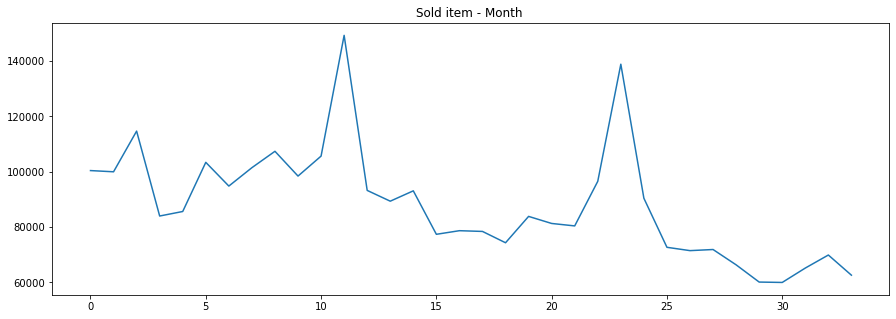

In [108]:
# 시간에 따른 총 판매량 확인
cnt_month = train_4[train_4.month_id!=34].pivot_table(index='month_id',values='cnt_month', aggfunc='sum', fill_value=0)
plt.figure(figsize=(15,5))
plt.plot(cnt_month)
plt.title('Sold item - Month ')
plt.show()

# 특정 기간(매년 12월) 판매량 급증
# 전체적으로는 하락 추세

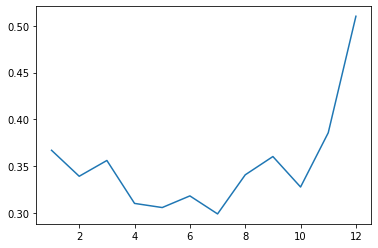

In [ ]:
# 월별 평균 판매량 확인
temp = train_4.pivot_table(index='month', values='cnt_month', aggfunc='mean')
plt.plot(temp)
# 상품 판매량 평균은 연말이 피크고, 4-6월이 낮음

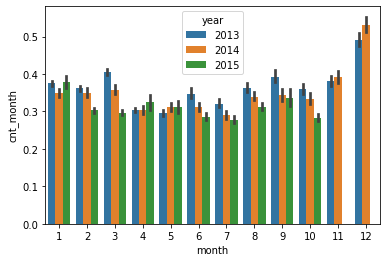

In [109]:
# 년/월별 상품 총 판매량 확인
sns.barplot(x='month', y='cnt_month', hue='year', data=train_4)
plt.show()

# 연말에 판매량 증가

<AxesSubplot:xlabel='main_cat', ylabel='cnt_month'>

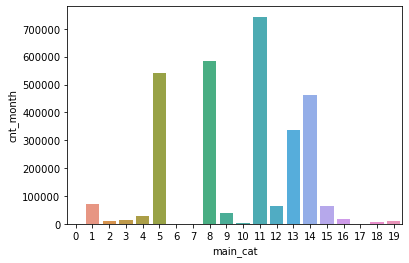

In [110]:
# 대분류별 상품 판매량 확인
temp = train_4.pivot_table(index='main_cat',values='cnt_month',aggfunc='sum')
sns.barplot(x=temp.index, y=temp.cnt_month)

# 판매량에 차이가 존재

<AxesSubplot:xlabel='sub_cat', ylabel='cnt_month'>

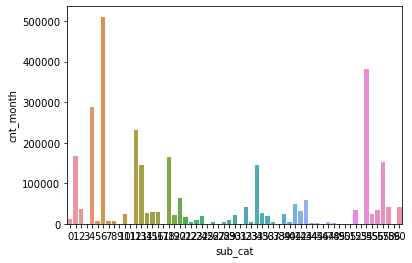

In [112]:
# 소분류별 판매량 확인
temp = train_4.pivot_table(index='sub_cat',values='cnt_month',aggfunc='sum')
sns.barplot(x=temp.index, y=temp.cnt_month)

# 판매량에 차이가 존재

C:\Users\user\AppData\Local\Temp/ipykernel_14264/310958003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['dayofweek'] = df_train.date.dt.dayofweek


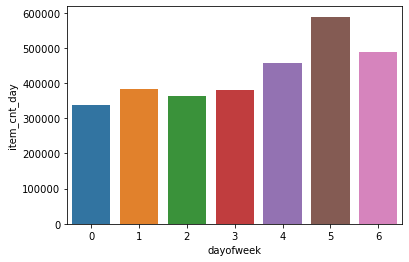

In [117]:
# df_train을 활용해 요일별 판매량 확인
df_train['dayofweek'] = df_train.date.dt.dayofweek
temp = df_train.pivot_table(index='dayofweek',values='item_cnt_day',aggfunc='sum')
sns.barplot(x=temp.index, y=temp['item_cnt_day'])
plt.show()

# 금/토/일이 나머지 평일에 비해 판매량이 많음

In [157]:
# 상품별로 가장 처음 판매된 month_id 피쳐 추가
first_sell = train_4.pivot_table(index='item_id',values='month_id', aggfunc='min')
first_sell.reset_index(inplace=True)
first_sell.columns=['item_id','first_sell']
train_4 = train_4.merge(first_sell, on='item_id', how='left')
train_4.head()

,month_id,shop_id,item_id,cnt_month,price_max,price_mean,price_min,city_id,cat_id,main_cat,sub_cat,year,month,first_sell
0,0,59,22154,1.0,999.0,999.0,999.0,30,37,11,1,2013,1,0
1,0,59,2552,0.0,0.0,0.0,0.0,30,58,13,29,2013,1,0
2,0,59,2554,0.0,0.0,0.0,0.0,30,58,13,29,2013,1,0
3,0,59,2555,0.0,0.0,0.0,0.0,30,56,13,5,2013,1,0
4,0,59,2564,0.0,0.0,0.0,0.0,30,59,13,40,2013,1,0


In [158]:
# 판매기간 컬럼 추가(해당 월에서 처음 판매된 월 빼기)
train_4['sales_month'] = train_4.month_id-train_4.first_sell
train_4.tail()

,month_id,shop_id,item_id,cnt_month,price_max,price_mean,price_min,city_id,cat_id,main_cat,sub_cat,year,month,first_sell,sales_month
8860573,34,45,18454,NaN,NaN,NaN,NaN,20,55,13,4,2015,11,23,11
8860574,34,45,16188,NaN,NaN,NaN,NaN,20,64,14,42,2015,11,32,2
8860575,34,45,15757,NaN,NaN,NaN,NaN,20,55,13,4,2015,11,0,34
8860576,34,45,19648,NaN,NaN,NaN,NaN,20,40,11,6,2015,11,23,11
8860577,34,45,969,NaN,NaN,NaN,NaN,20,37,11,1,2015,11,17,17


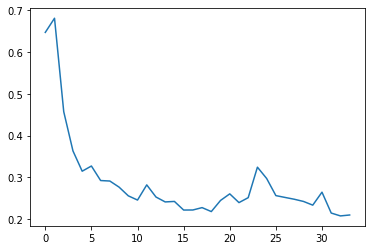

In [ ]:
# 판매기간과 판매량 확인
temp = train_4.pivot_table(index='sales_month', values='cnt_month', aggfunc='mean')
plt.plot(temp)

# 최근 발매했을 수록 평균 판매량이 높은 경향이 있음

In [159]:
# 사용하지 않은 피쳐 제거
train_4.drop(['price_max','price_min'],axis=1,inplace=True)
train_4.head()

,month_id,shop_id,item_id,cnt_month,price_mean,city_id,cat_id,main_cat,sub_cat,year,month,first_sell,sales_month
0,0,59,22154,1.0,999.0,30,37,11,1,2013,1,0,0
1,0,59,2552,0.0,0.0,30,58,13,29,2013,1,0,0
2,0,59,2554,0.0,0.0,30,58,13,29,2013,1,0,0
3,0,59,2555,0.0,0.0,30,56,13,5,2013,1,0,0
4,0,59,2564,0.0,0.0,30,59,13,40,2013,1,0,0


In [160]:
# 필요없는 컬럼 제거
train_4.drop(['first_sell'],axis=1,inplace=True)
train_4.head()

,month_id,shop_id,item_id,cnt_month,price_mean,city_id,cat_id,main_cat,sub_cat,year,month,sales_month
0,0,59,22154,1.0,999.0,30,37,11,1,2013,1,0
1,0,59,2552,0.0,0.0,30,58,13,29,2013,1,0
2,0,59,2554,0.0,0.0,30,58,13,29,2013,1,0
3,0,59,2555,0.0,0.0,30,56,13,5,2013,1,0
4,0,59,2564,0.0,0.0,30,59,13,40,2013,1,0


# 기준에 다른 평균 판매량 피쳐 추가

In [161]:
# 기준별 평균 월간 판매량을 계산해 새로운 컬럼으로 추가하는 함수 정의
def mean_cnt_month(data, features):
    
    # 새로 생성될 피처명 생성
    new_feature_name = '/'.join(features[1:])+'_mean_cnt'
    
    # 기준에 따라 월간 평균 판매량 구하기
    pivot = data.pivot_table(index=features, values='cnt_month', aggfunc='mean')
    pivot = pivot.reset_index().rename(columns={'cnt_month': new_feature_name})
    
    # data와 pivot 병합 
    data = data.merge(pivot, on=features, how='left')
    
    del pivot

    return data

In [165]:
train_4 = mean_cnt_month(train_4,['month_id','item_id'])
train_4[['item_id_mean_cnt','cnt_month']].corr()

,item_id_mean_cnt,cnt_month
item_id_mean_cnt,1.000000,0.621258
cnt_month,0.621258,1.000000


In [167]:
train_4 = mean_cnt_month(train_4, ['month_id','shop_id'])
train_4[['shop_id_mean_cnt','cnt_month']].corr()

,shop_id_mean_cnt,cnt_month
shop_id_mean_cnt,1.000000,0.083184
cnt_month,0.083184,1.000000


In [168]:
train_4 = mean_cnt_month(train_4, ['month_id','city_id'])
train_4[['city_id_mean_cnt','cnt_month']].corr()

,city_id_mean_cnt,cnt_month
city_id_mean_cnt,1.000000,0.059339
cnt_month,0.059339,1.000000


In [169]:
train_4 = mean_cnt_month(train_4, ['month_id','main_cat'])
train_4[['main_cat_mean_cnt','cnt_month']].corr()

,main_cat_mean_cnt,cnt_month
main_cat_mean_cnt,1.000000,0.111293
cnt_month,0.111293,1.000000


In [170]:
train_4 = mean_cnt_month(train_4, ['month_id','sub_cat'])
train_4[['sub_cat_mean_cnt','cnt_month']].corr()

,sub_cat_mean_cnt,cnt_month
sub_cat_mean_cnt,1.000000,0.489166
cnt_month,0.489166,1.000000


In [171]:
train_4 = mean_cnt_month(train_4, ['month_id','month'])
train_4[['month_mean_cnt','cnt_month']].corr()

,month_mean_cnt,cnt_month
month_mean_cnt,1.000000,0.016667
cnt_month,0.016667,1.000000


In [172]:
train_4 = mean_cnt_month(train_4, ['month_id','price_mean'])
train_4[['price_mean_mean_cnt','cnt_month']].corr()

,price_mean_mean_cnt,cnt_month
price_mean_mean_cnt,1.000000,0.800423
cnt_month,0.800423,1.000000


In [173]:
train_4 = mean_cnt_month(train_4, ['month_id','item_id','city_id'])
train_4[['item_id/city_id_mean_cnt','cnt_month']].corr()

,item_id/city_id_mean_cnt,cnt_month
item_id/city_id_mean_cnt,1.000000,0.896219
cnt_month,0.896219,1.000000


In [174]:
train_4 = mean_cnt_month(train_4, ['month_id','shop_id','cat_id'])
train_4[['shop_id/cat_id_mean_cnt','cnt_month']].corr()

,shop_id/cat_id_mean_cnt,cnt_month
shop_id/cat_id_mean_cnt,1.000000,0.785783
cnt_month,0.785783,1.000000


In [176]:
# 상관관계가 낮은 컬럼 제외
train_4.drop(['shop_id_mean_cnt', 'city_id_mean_cnt', 'main_cat_mean_cnt', 'month_mean_cnt'], axis=1, inplace=True)
train_4.head()

,month_id,shop_id,item_id,cnt_month,price_mean,city_id,cat_id,main_cat,sub_cat,year,month,sales_month,item_id_mean_cnt,sub_cat_mean_cnt,price_mean_mean_cnt,item_id/city_id_mean_cnt,shop_id/cat_id_mean_cnt
0,0,59,22154,1.0,999.0,30,37,11,1,2013,1,0,0.457143,0.208571,2.783668,1.0,0.096774
1,0,59,2552,0.0,0.0,30,58,13,29,2013,1,0,0.000000,0.046831,0.000000,0.0,0.000000
2,0,59,2554,0.0,0.0,30,58,13,29,2013,1,0,0.028571,0.046831,0.000000,0.0,0.000000
3,0,59,2555,0.0,0.0,30,56,13,5,2013,1,0,0.028571,0.060099,0.000000,0.0,0.011494
4,0,59,2564,0.0,0.0,30,59,13,40,2013,1,0,0.142857,0.096500,0.000000,0.0,0.013245


# 지정한 피쳐의 특정 개월 전의 값을 피쳐로 추가

In [178]:
# 각 매장/상품 별로 임의로 정한 개월 수 이전의 값으로 컬럼을 추가하는 함수 정의
# num_lags=2라면 1개월전의 값 컬럼과 2개월전의 값 컬럼이 생성됨
# rolling()과 같은 과정이지만 현 데이터에 rolling을 적용하기 복잡하기 때문에 함수로 정의해서 사용

def make_lags(data, feature, num_lags):
    temp = data[['month_id','shop_id','item_id',feature]].copy() # 원본은 건드리지 않도록 copy()

    # lag 피쳐 생성 및 기존 데이터와 병합
    for i in range(num_lags):
        column_name = feature+'_'+str(i+1) # 새로 생성될 컬럼명 지정 
        temp.columns = ['month_id','shop_id','item_id',column_name] # temp 컬럼명 새 이름으로 재지정
        temp['month_id'] = temp['month_id']+(i+1) # month_id에 해당 lag 숫자(몇 개월 전인지)를 더하기 > 해당 숫자만큼 월이 밀린 데이터가 됨 
        data = data.merge(temp, on=['month_id','shop_id','item_id'], how='left')
        data[column_name] = data[column_name].fillna(0) # 판매이력이 없는 경우(신상품) NaN이 존재할 수 있으므로 결측치는 0으로 대체
    del temp
    return data

In [49]:
# 월 판매량 lags 추가
train_4 = make_lags(train_4, 'cnt_month', 3)
train_4.head()

,month_id,shop_id,item_id,cnt_month,price_mean,city_id,cat_id,main_cat,sub_cat,year,...,first_sell,sales_month,item_id_mean_cnt,sub_cat_mean_cnt,price_mean_mean_cnt,item_id/city_id_mean_cnt,shop_id/cat_id_mean_cnt,cnt_month_1,cnt_month_2,cnt_month_3
0,0,59,22154,1.0,999.0,30,37,11,1,2013,...,0,0,0.457143,0.209862,2.796562,1.0,0.096774,0.0,0.0,0.0
1,0,59,2552,0.0,0.0,30,58,13,29,2013,...,0,0,0.028571,0.048268,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0,59,2554,0.0,0.0,30,58,13,29,2013,...,0,0,0.028571,0.048268,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0,59,2555,0.0,0.0,30,56,13,5,2013,...,0,0,0.028571,0.060099,0.000000,0.0,0.011494,0.0,0.0,0.0
4,0,59,2564,0.0,0.0,30,59,13,40,2013,...,0,0,0.142857,0.097635,0.000000,0.0,0.013245,0.0,0.0,0.0


In [179]:
# 이전에 추가했던 기준별 평균 판매량에 대해 lags 추가
train_4 = make_lags(train_4, 'item_id_mean_cnt', 3)
train_4 = make_lags(train_4, 'sub_cat_mean_cnt', 3)
train_4 = make_lags(train_4, 'price_mean_mean_cnt', 3)
train_4 = make_lags(train_4, 'item_id/city_id_mean_cnt', 3)
train_4 = make_lags(train_4, 'shop_id/cat_id_mean_cnt', 3)
train_4.tail()

,month_id,shop_id,item_id,cnt_month,price_mean,city_id,cat_id,main_cat,sub_cat,year,...,sub_cat_mean_cnt_3,price_mean_mean_cnt_1,price_mean_mean_cnt_2,price_mean_mean_cnt_3,item_id/city_id_mean_cnt_1,item_id/city_id_mean_cnt_2,item_id/city_id_mean_cnt_3,shop_id/cat_id_mean_cnt_1,shop_id/cat_id_mean_cnt_2,shop_id/cat_id_mean_cnt_3
8860573,34,45,18454,NaN,NaN,20,55,13,4,2015,...,0.207317,1.545279,0.0,0.0,0.5,0.0,0.0,0.126866,0.106061,0.128242
8860574,34,45,16188,NaN,NaN,20,64,14,42,2015,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.094488,0.000000,0.000000
8860575,34,45,15757,NaN,NaN,20,55,13,4,2015,...,0.207317,0.000000,0.0,0.0,0.0,0.0,0.0,0.126866,0.106061,0.128242
8860576,34,45,19648,NaN,NaN,20,40,11,6,2015,...,0.231667,0.000000,0.0,0.0,0.0,0.0,0.0,0.083756,0.112455,0.083426
8860577,34,45,969,NaN,NaN,20,37,11,1,2015,...,0.151524,0.000000,0.0,0.0,0.5,0.0,0.0,0.128205,0.124088,0.093750


In [180]:
# month_id 0,1,2 데이터 제거 > 3개월 만큼 lags 생성했기때문에 해당값이 없음
train_4 = train_4.drop(train_4[train_4['month_id'] < 3].index)

In [181]:
# 테스트 데이터에 존재하지 않을 데이터 컬럼 제거
data_1 = train_4.drop(['price_mean','item_id_mean_cnt','sub_cat_mean_cnt','price_mean_mean_cnt',
                        'item_id/city_id_mean_cnt','shop_id/cat_id_mean_cnt'],axis=1)

In [182]:
# 결측값 확인
data_1.isnull().sum()

# 예측해야할 target을 제외한 결측값 없음

month_id                           0
shop_id                            0
item_id                            0
cnt_month                     214200
city_id                            0
cat_id                             0
main_cat                           0
sub_cat                            0
year                               0
month                              0
sales_month                        0
item_id_mean_cnt_1                 0
item_id_mean_cnt_2                 0
item_id_mean_cnt_3                 0
sub_cat_mean_cnt_1                 0
sub_cat_mean_cnt_2                 0
sub_cat_mean_cnt_3                 0
price_mean_mean_cnt_1              0
price_mean_mean_cnt_2              0
price_mean_mean_cnt_3              0
item_id/city_id_mean_cnt_1         0
item_id/city_id_mean_cnt_2         0
item_id/city_id_mean_cnt_3         0
shop_id/cat_id_mean_cnt_1          0
shop_id/cat_id_mean_cnt_2          0
shop_id/cat_id_mean_cnt_3          0
dtype: int64

In [55]:
# 파일 내보내기
data_1.to_pickle('data_1.pkl')

# 기타
- EDA, 전처리 간 활용한 함수

In [162]:
# 주어진 피쳐들의 조합으로 생성된 기준으로 평균 판매량 피쳐를 생성하고, cnt_month와의 상관계수를 보여주는 함수

def all_corr(data,features,num_features): # 데이터프레임, 사용할피쳐, 조합을 만들 피쳐 갯수
    # 결과값을 담을 리스트 생성
    result = []
    # 주어진 피쳐와 개수로 가능한 모든 조합 생성
    combi = list(itertools.combinations(features,num_features))
    
    for i in range(len(combi)):
        # 새로운 컬럼명 생성
        feature_name = '/'.join(combi[i])+'_mean_cnt'
        # 해당 조합의 가장 앞에 월 구분 id 추가  
        temp = list(combi[i])
        temp.insert(0,'month_id')
        # 해당 기준으로 월간 평균 판매량 컬럼 생성  
        df = mean_cnt_month(data,temp)
        # 생성된 데이터프레임내에서 상관계수 계산
        cor = df[[feature_name,'cnt_month']].corr().iloc[0,1]
        # 상관계수만 결과 리스트에 저장
        result.append([feature_name,cor])
        
    del combi, feature_name, temp, df, cor  
    return result

- 초기 전처리 후, 모델링 간 데이터 변경 내역

In [ ]:
# 1. 판매량 이상값 단순 제거 : 0미만, 450이상 데이터 삭제

# 2. 월별 금/토/일 수 피쳐 추가 : 해당 코드 아래 참고
fss = pd.Series([12,12,15,12,13,14,12,14,13,12,14,13,
                13,12,14,12,14,13,12,15,12,13,14,12,
                 14,12,13,12,15,12,13,14,12,14,13])
data['fss'] = data['month_id'].map(fss).astype(np.int8)

# 3. 월별 일수 피쳐 추가 : 2번 코드와 전반적으로 동일